In [145]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
csv_path="C:/Users/abhis/Desktop/Python/Heart_disease_classification/heart.csv"
heart_data=pd.read_csv(csv_path)
heart_data.describe(include="all")
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [146]:
#checking for na
heart_data.info()# the dataset does not have any na's
#plotting targer column against independent columns 
column_names=[]
for col in heart_data.columns:
    column_names.append(col)
column_names.pop(13)
print(column_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


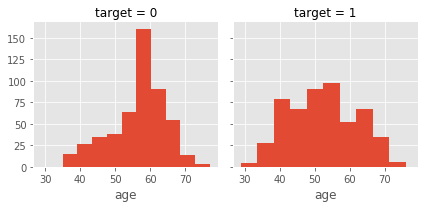

In [147]:
g = sns.FacetGrid(heart_data, col = "target")
g.map(plt.hist, column_names[0])
plt.show()

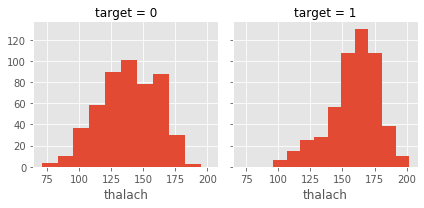

In [148]:
g = sns.FacetGrid(heart_data, col = "target")
g.map(plt.hist, column_names[7])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


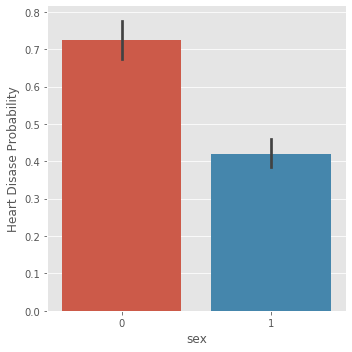

In [149]:
plot=sns.factorplot(x=column_names[1],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

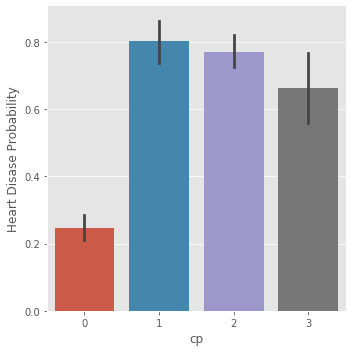

In [150]:
plot=sns.factorplot(x=column_names[2],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

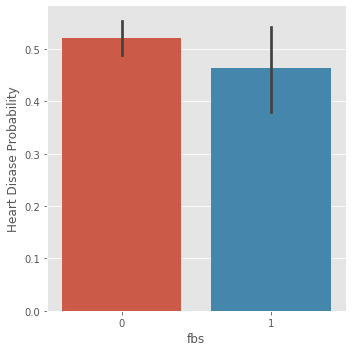

In [151]:
plot=sns.factorplot(x=column_names[5],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

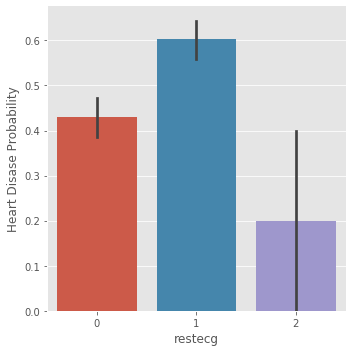

In [152]:
plot=sns.factorplot(x=column_names[6],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

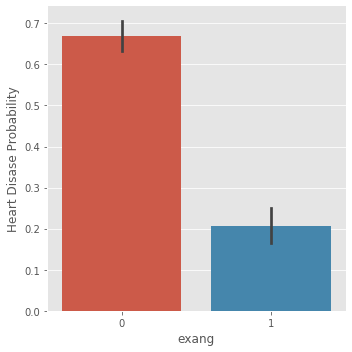

In [153]:
plot=sns.factorplot(x=column_names[8],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

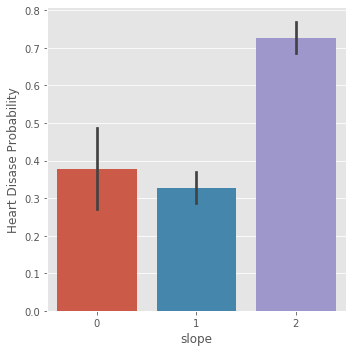

In [154]:
plot=sns.factorplot(x=column_names[10],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

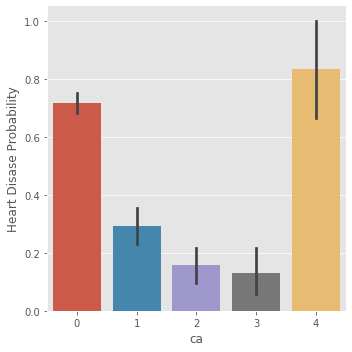

In [155]:
plot=sns.factorplot(x=column_names[11],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

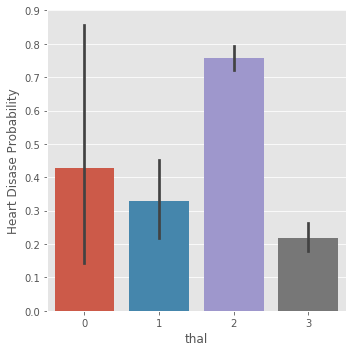

In [156]:
plot=sns.factorplot(x=column_names[12],y="target",data=heart_data,kind="bar")
plot.set_ylabels("Heart Disase Probability")
plt.show()

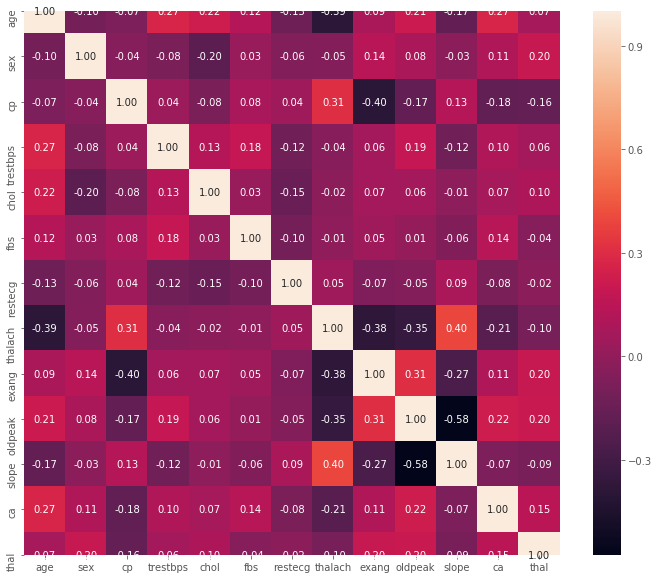

In [157]:
#creating correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(heart_data[column_names].corr(), annot = True, fmt = ".2f")
plt.show()

In [158]:
#getting dummy data for columns that have upto 4diff classes.
dummy_list = ["sex","cp","restecg","fbs","exang","slope","thal"]
expanded_heart_data=pd.get_dummies(heart_data,columns=dummy_list)
expanded_heart_data.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,fbs_1,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,2,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,0,0,1,1,...,1,0,1,1,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,1
3,61,148,203,161,0.0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,62,138,294,106,1.9,3,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0


In [159]:
#splitting data
y=expanded_heart_data.target
x_data=expanded_heart_data.drop(["target"],axis=1)
#normalizing data as some columns have higher range than rest
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

717
308
717
308


In [160]:
#comparing multiple algorithms to check which gives best results
#importing packages for algorithms
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
scoring='accuracy'
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
names=[]
results=[]
i=0
for name,model in models:
    kfold=KFold(n_splits=10,random_state=1234)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("Name:",name, "Mean :",cv_results.mean(),"Std :", cv_results.std())


Name: LR Mean : 0.8383020344287949 Std : 0.046339062733716845


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Name: KNN Mean : 0.8075508607198749 Std : 0.048877833084129074
Name: DT Mean : 0.9749413145539906 Std : 0.02133178964189122


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Name: RF Mean : 0.9888693270735525 Std : 0.014962538315145858


In [161]:
#since Random forest seems to be performing the best out of all the algorithms tested, final model will be made 
#with random fores
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("accuracy :",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy : 0.9935064935064936
[[149   0]
 [  2 157]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       149
           1       1.00      0.99      0.99       159

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
